In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%pylab inline
import re
sns.set_style("whitegrid")
import altair as alt


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Lets load data from business dataset
business = pd.read_json(r'C:/Users/hp/Desktop/dma cp/business.json',lines=True)
business.head(10)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC
5,"Credit Valley Town Plaza, F2 - 6045 Creditview Rd","{'BusinessParking': '{'garage': False, 'street...",68dUKd8_8liJ7in4aWOSEA,"Shipping Centers, Couriers & Delivery Services...",Mississauga,"{'Monday': '9:0-19:0', 'Tuesday': '9:0-20:0', ...",1,43.599475,-79.711584,The UPS Store,L5V 0B1,3,2.5,ON
6,20 Douglas Woods Drive Southeast,"{'RestaurantsPriceRange2': '2', 'BusinessParki...",5JucpCfHZltJh5r1JabjDg,"Beauty & Spas, Hair Salons",Calgary,None,1,50.943646,-114.001828,Edgeworxx Studio,T2Z 1K4,7,3.5,AB
7,"4545 E Tropicana Rd Ste 8, Tropicana","{'RestaurantsPriceRange2': '3', 'GoodForKids':...",gbQN7vr_caG_A1ugSmGhWg,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,"{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'...",1,36.099872,-115.074574,Supercuts,89121,3,3.5,NV
8,5940 W Union Hills Dr,"{'RestaurantsPriceRange2': '2', 'ByAppointment...",Y6iyemLX_oylRpnr38vgMA,"Nail Salons, Beauty & Spas, Day Spas",Glendale,"{'Tuesday': '12:0-18:0', 'Wednesday': '10:0-18...",0,33.654815,-112.188568,Vita Bella Fine Day Spa,85308,8,5.0,AZ
9,21689 Lorain Rd,"{'ByAppointmentOnly': 'False', 'BusinessAccept...",4GBVPIYRvzGh4K4TkRQ_rw,"Beauty & Spas, Nail Salons, Day Spas, Massage",Fairview Park,"{'Tuesday': '9:0-21:0', 'Wednesday': '9:0-21:0...",1,41.440825,-81.854097,Options Salon & Spa,44126,8,4.5,OH


In [3]:
res = business['city'].str.contains(pat = 'Vegas')
#print(res)
ram=pd.DataFrame(business.loc[res,['city','categories','business_id','name','is_open','review_count']]).fillna('unknown')
#print(ram)

In [4]:
result=ram.categories.str.contains(pat = 'Shopping')
ram1=pd.DataFrame(ram.loc[result,['categories','city','business_id','name','is_open','review_count']])
b_iid=ram1.set_index('business_id')
dd_bid=ram1.business_id
#print(b_iid)

In [5]:
result=ram.categories.str.contains(pat = 'Shopping')
ram1=pd.DataFrame(ram.loc[result,['categories','city','business_id','name','is_open','review_count']])
b_iid=ram1.set_index('business_id')
dd_bid=ram1.business_id
#print(b_iid)

In [6]:
ram1.reset_index(inplace = True, drop = True) 
ram1.head(1)

,categories,city,business_id,name,is_open,review_count
0,"Hair Salons, Hair Stylists, Barbers, Men's Hai...",Las Vegas,gbQN7vr_caG_A1ugSmGhWg,Supercuts,1,3


In [7]:
tipp = pd.read_json(r'C:/Users/hp/Desktop/dma cp/tip.json',lines=True)
tipp.head(10)

,business_id,compliment_count,date,text,user_id
0,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24,"Great for watching games, ufc, and whatever el...",UPw5DWs_b-e2JRBS-t37Ag
1,OPiPeoJiv92rENwbq76orA,0,2013-05-25 06:00:56,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg
2,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17,Good chips and salsa. Loud at times. Good serv...,jRyO2V1pA4CdVVqCIOPc1Q
3,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49,The setting and decoration here is amazing. Co...,FuTJWFYm4UKqewaosss1KA
4,AkL6Ous6A1atZejfZXn1Bg,0,2012-10-06 00:19:27,Molly is definately taking a picture with Sant...,LUlKtaM3nXd-E4N4uOk_fQ
5,kj1p6NwUGROOoqNySf0I1Q,0,2011-12-31 18:02:42,It's true! The drunken noodles are outrageous!,iAd8XaHxv05iXyEiZ62Ibw
6,0hudPyuCBlKg79OwKBw-eQ,0,2012-10-11 23:06:21,"Only worth a visit in the summer time, to take...",w8p4JW6-ERsbg8aB5wjEAg
7,r49iBfbnfoK7yt4rdsL_7g,0,2016-01-05 06:39:33,Hands down best AYCE in town! Love it!,CaFbX7topxdLpBJ_SNDfGQ
8,YCRCFBr6myPS49on2aS2pQ,0,2017-03-13 03:29:40,Sat in the drive thru this afternoon for 30 mi...,VLy6l8L72adD7iTBNqiPXw
9,RTBIiq-fJUXRsrzbL4MCqw,0,2013-02-08 20:55:15,Okay so I had a groupon for a nearby service c...,zrvk0-B91ahJRSB-UcAmIA


In [8]:
#Merging business and tip data wrt business_id currently running
join_text=pd.merge(tipp,ram1,on='business_id',how='inner')
join_text
joined_text=join_text[join_text.is_open == 1]
joined_text

,business_id,compliment_count,date,text,user_id,categories,city,name,is_open,review_count
0,jaJnPIX9VxsFyfV5zQwk0g,0,2011-01-01 23:54:04,Lots of people on the second floor!,29yBaTFMSh-l6wNwy9d_mA,"Shopping, Local Flavor, Arts & Entertainment, ...",Las Vegas,Coca-Cola Store Las Vegas,1,541
1,jaJnPIX9VxsFyfV5zQwk0g,0,2012-05-20 01:24:56,Trying the around the world sampler for the fi...,f4_MRNHvN-yRn7EA8YWRxg,"Shopping, Local Flavor, Arts & Entertainment, ...",Las Vegas,Coca-Cola Store Las Vegas,1,541
2,jaJnPIX9VxsFyfV5zQwk0g,0,2010-03-12 01:18:53,Walking around with the fams,xWpI52PuDd0yIE0lc_lPlg,"Shopping, Local Flavor, Arts & Entertainment, ...",Las Vegas,Coca-Cola Store Las Vegas,1,541
3,jaJnPIX9VxsFyfV5zQwk0g,0,2010-01-31 00:56:26,so much coke! best brand ever,5jLkKtE4HPlrbjw-0w9lvg,"Shopping, Local Flavor, Arts & Entertainment, ...",Las Vegas,Coca-Cola Store Las Vegas,1,541
4,jaJnPIX9VxsFyfV5zQwk0g,0,2010-12-31 04:43:09,2 floors!,29yBaTFMSh-l6wNwy9d_mA,"Shopping, Local Flavor, Arts & Entertainment, ...",Las Vegas,Coca-Cola Store Las Vegas,1,541
5,jaJnPIX9VxsFyfV5zQwk0g,0,2012-08-07 06:14:58,"""Beverly"" ain't my cup of... coke.",KcEfVfc5nTPBDonYjJ3wOw,"Shopping, Local Flavor, Arts & Entertainment, ...",Las Vegas,Coca-Cola Store Las Vegas,1,541
6,jaJnPIX9VxsFyfV5zQwk0g,0,2013-12-20 01:31:20,The sampler tray was fun.,0SZYtW-UV4l8LNkBYH5ZUA,"Shopping, Local Flavor, Arts & Entertainment, ...",Las Vegas,Coca-Cola Store Las Vegas,1,541
7,jaJnPIX9VxsFyfV5zQwk0g,0,2012-10-07 22:53:19,try the goober float.,fCPADHhpkVVAzExa08_ZyQ,"Shopping, Local Flavor, Arts & Entertainment, ...",Las Vegas,Coca-Cola Store Las Vegas,1,541
8,jaJnPIX9VxsFyfV5zQwk0g,0,2011-01-02 06:36:12,The soda fountain is closed!,29yBaTFMSh-l6wNwy9d_mA,"Shopping, Local Flavor, Arts & Entertainment, ...",Las Vegas,Coca-Cola Store Las Vegas,1,541
9,jaJnPIX9VxsFyfV5zQwk0g,0,2010-12-24 23:32:02,Taste the world,KyieFxrQxDx6ncUVLaCPAQ,"Shopping, Local Flavor, Arts & Entertainment, ...",Las Vegas,Coca-Cola Store Las Vegas,1,541


In [9]:
joined_text=joined_text.drop(['compliment_count', 'city','is_open'], axis=1)

In [10]:
joined_text.reset_index(inplace = True, drop = True) 
joined_text

,business_id,date,text,user_id,categories,name,review_count
0,jaJnPIX9VxsFyfV5zQwk0g,2011-01-01 23:54:04,Lots of people on the second floor!,29yBaTFMSh-l6wNwy9d_mA,"Shopping, Local Flavor, Arts & Entertainment, ...",Coca-Cola Store Las Vegas,541
1,jaJnPIX9VxsFyfV5zQwk0g,2012-05-20 01:24:56,Trying the around the world sampler for the fi...,f4_MRNHvN-yRn7EA8YWRxg,"Shopping, Local Flavor, Arts & Entertainment, ...",Coca-Cola Store Las Vegas,541
2,jaJnPIX9VxsFyfV5zQwk0g,2010-03-12 01:18:53,Walking around with the fams,xWpI52PuDd0yIE0lc_lPlg,"Shopping, Local Flavor, Arts & Entertainment, ...",Coca-Cola Store Las Vegas,541
3,jaJnPIX9VxsFyfV5zQwk0g,2010-01-31 00:56:26,so much coke! best brand ever,5jLkKtE4HPlrbjw-0w9lvg,"Shopping, Local Flavor, Arts & Entertainment, ...",Coca-Cola Store Las Vegas,541
4,jaJnPIX9VxsFyfV5zQwk0g,2010-12-31 04:43:09,2 floors!,29yBaTFMSh-l6wNwy9d_mA,"Shopping, Local Flavor, Arts & Entertainment, ...",Coca-Cola Store Las Vegas,541
5,jaJnPIX9VxsFyfV5zQwk0g,2012-08-07 06:14:58,"""Beverly"" ain't my cup of... coke.",KcEfVfc5nTPBDonYjJ3wOw,"Shopping, Local Flavor, Arts & Entertainment, ...",Coca-Cola Store Las Vegas,541
6,jaJnPIX9VxsFyfV5zQwk0g,2013-12-20 01:31:20,The sampler tray was fun.,0SZYtW-UV4l8LNkBYH5ZUA,"Shopping, Local Flavor, Arts & Entertainment, ...",Coca-Cola Store Las Vegas,541
7,jaJnPIX9VxsFyfV5zQwk0g,2012-10-07 22:53:19,try the goober float.,fCPADHhpkVVAzExa08_ZyQ,"Shopping, Local Flavor, Arts & Entertainment, ...",Coca-Cola Store Las Vegas,541
8,jaJnPIX9VxsFyfV5zQwk0g,2011-01-02 06:36:12,The soda fountain is closed!,29yBaTFMSh-l6wNwy9d_mA,"Shopping, Local Flavor, Arts & Entertainment, ...",Coca-Cola Store Las Vegas,541
9,jaJnPIX9VxsFyfV5zQwk0g,2010-12-24 23:32:02,Taste the world,KyieFxrQxDx6ncUVLaCPAQ,"Shopping, Local Flavor, Arts & Entertainment, ...",Coca-Cola Store Las Vegas,541


In [11]:
import nltk

In [12]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [14]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [15]:
df=joined_text


In [16]:
# Convert to list
data = df.text.values.tolist()

In [17]:
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Lots of people on the second floor!']


In [18]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['lots', 'of', 'people', 'on', 'the', 'second', 'floor']]


In [19]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['lots', 'of', 'people', 'on', 'the', 'second_floor']


In [20]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

lemma = WordNetLemmatizer()

In [21]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def clean(doc):
    stop_free = " ".join([i for i in doc.split(",") if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized



In [30]:

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


In [23]:
data_words_bigrams[0]

['lots', 'people', 'second', 'floor']

In [24]:


# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = clean(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized = data_words_bigrams

In [25]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:7])

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(4, 1), (10, 1), (11, 1)], [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1)], [(17, 1)], [(14, 1), (18, 1), (19, 1), (20, 1)], [(6, 1), (21, 1), (22, 1)]]


In [26]:
id2word[0]

'floor'

In [27]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:20]]

[[('floor', 1), ('lots', 1), ('people', 1), ('second', 1)],
 [('around', 1),
  ('first', 1),
  ('sampler', 1),
  ('time', 1),
  ('trying', 1),
  ('world', 1)],
 [('around', 1), ('fams', 1), ('walking', 1)],
 [('best', 1), ('brand', 1), ('coke', 1), ('ever', 1), ('much', 1)],
 [('floors', 1)],
 [('coke', 1), ('aint', 1), ('beverly', 1), ('cup', 1)],
 [('sampler', 1), ('fun', 1), ('tray', 1)],
 [('float', 1), ('goober', 1), ('try', 1)],
 [('closed', 1), ('fountain', 1), ('soda', 1)],
 [('world', 1), ('taste', 1)],
 [('around', 1),
  ('sampler', 1),
  ('world', 1),
  ('coke', 1),
  ('order', 1),
  ('skip', 1)],
 [('world', 1),
  ('try', 1),
  ('china', 1),
  ('comes', 1),
  ('different', 1),
  ('fav', 1),
  ('italy', 1),
  ('worst', 1)],
 [('soda', 1)],
 [('coca_cola', 1), ('pics', 1), ('polar_bear', 1), ('take', 1), ('th', 1)],
 [('around', 1), ('world', 1), ('try', 1)],
 [('around', 1),
  ('trying', 1),
  ('world', 1),
  ('coke', 1),
  ('fun', 1),
  ('taste', 1),
  ('cola', 1),
  ('reco

In [28]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [29]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"get" + 0.033*"awesome" + 0.033*"shop" + 0.019*"buy" + 0.017*"would" '
  '+ 0.016*"super" + 0.016*"sale" + 0.016*"want" + 0.014*"dj" + 0.014*"price"'),
 (1,
  '0.060*"store" + 0.031*"go" + 0.028*"prices" + 0.023*"recommend" + '
  '0.019*"back" + 0.019*"thank" + 0.018*"selection" + 0.017*"always" + '
  '0.015*"budget" + 0.013*"check"'),
 (2,
  '0.103*"great" + 0.071*"service" + 0.031*"customer" + 0.029*"good" + '
  '0.027*"best" + 0.026*"staff" + 0.024*"helpful" + 0.024*"friendly" + '
  '0.019*"dont" + 0.015*"amazing"'),
 (3,
  '0.080*"place" + 0.056*"love" + 0.041*"nice" + 0.038*"time" + 0.029*"first" '
  '+ 0.028*"really" + 0.018*"look" + 0.013*"find" + 0.012*"options" + '
  '0.012*"owner"'),
 (4,
  '0.035*"one" + 0.023*"like" + 0.022*"youre" + 0.022*"new" + '
  '0.019*"las_vegas" + 0.018*"got" + 0.018*"also" + 0.015*"need" + '
  '0.014*"clean" + 0.013*"business"')]


In [31]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.667781878309302

Coherence Score:  0.2849212252510698


In [32]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis


C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.382254 -0.005886       1        1  27.881578
1     -0.107475 -0.299933       2        1  20.710743
0     -0.100389  0.252275       3        1  20.708803
4     -0.090975  0.025560       4        1  15.670321
3     -0.083415  0.027984       5        1  15.028556, topic_info=     Category         Freq       Term        Total  loglift  logprob
75    Default  6210.000000      great  6210.000000  30.0000  30.0000
196   Default  4295.000000    service  4295.000000  29.0000  29.0000
232   Default  2604.000000      place  2604.000000  28.0000  28.0000
45    Default  2692.000000      store  2692.000000  27.0000  27.0000
47    Default  1824.000000       love  1824.000000  26.0000  26.0000
49    Default  1639.000000        get  1639.000000  25.0000  25.0000
76    Default  1342.000000       nice  1342.000000  24.0000  24.0000
193   Default  1885.000000   customer  1885.000000  23.0000  23.0000
113   Default  1483.000000    awesome  1483.000000  22.0000  22.0000
7     Default  1227.000000       time  1227.000000  21.0000  21.0000
114   Default  1474.000000       shop  1474.000000  20.0000  20.0000
91    Default  1776.000000       good  1776.000000  19.0000  19.0000
52    Default  1398.000000         go  1398.000000  18.0000  18.0000
224   Default  1180.000000        one  1180.000000  17.0000  17.0000
12    Default  1647.000000       best  1647.000000  16.0000  16.0000
308   Default  1579.000000      staff  1579.000000  15.0000  15.0000
214   Default  1235.000000     prices  1235.000000  14.0000  14.0000
465   Default  1435.000000    helpful  1435.000000  13.0000  13.0000
419   Default  1432.000000   friendly  1432.000000  12.0000  12.0000
5     Default   927.000000      first   927.000000  11.0000  11.0000
328   Default   914.000000     really   914.000000  10.0000  10.0000
44    Default  1045.000000  recommend  1045.000000   9.0000   9.0000
266   Default   794.000000       like   794.000000   8.0000   8.0000
189   Default  1115.000000       dont  1115.000000   7.0000   7.0000
377   Default   761.000000      youre   761.000000   6.0000   6.0000
469   Default   756.000000        new   756.000000   5.0000   5.0000
178   Default   868.000000        buy   868.000000   4.0000   4.0000
523   Default   866.000000       back   866.000000   3.0000   3.0000
670   Default   863.000000      thank   863.000000   2.0000   2.0000
571   Default   814.000000  selection   814.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
47     Topic5  1823.325806       love  1824.020630   1.8948  -2.8795
76     Topic5  1341.636963       nice  1342.328979   1.8947  -3.1863
7      Topic5  1226.436768       time  1227.132935   1.8947  -3.2761
328    Topic5   914.035461     really   914.735229   1.8945  -3.5701
5      Topic5   926.790955      first   927.519226   1.8944  -3.5562
263    Topic5   569.261902       look   569.974121   1.8940  -4.0436
789    Topic5   421.341309       find   422.032928   1.8936  -4.3445
6200   Topic5   377.676697      owner   378.373322   1.8934  -4.4539
1239   Topic5   373.784698      happy   374.483337   1.8934  -4.4643
118    Topic5   358.109680       cool   358.801544   1.8933  -4.5071
2870   Topic5   388.593201    options   389.360870   1.8932  -4.4254
1083   Topic5   375.182312     family   375.947174   1.8932  -4.4605
1285   Topic5   277.269043         us   277.962921   1.8927  -4.7629
816    Topic5   264.204437      shoes   264.893280   1.8926  -4.8112
66     Topic5   261.093292       call   261.789703   1.8926  -4.8231
907    Topic5   254.105743    located   254.797180   1.8925  -4.8502
1051   Topic5   325.756317       ones   326.677856   1.8924  -4.6018
239    Topic5   238.855362   purchase   239.547836   1.8923  -4.9121
825    Topic5   237.833069       spot   238.527008   1.8923  -4.9164
292    Topic5   231.013596    product   231.713821   1.8922 

In [33]:
import os
from gensim.models.wrappers import LdaMallet

#C:\Users\hp\Downloads\mallet-2.0.8
os.environ['MALLET_HOME']='C:/Users/hp/Downloads/mallet-2.0.8/'
mallet_path ='C:/Users/hp/Downloads/mallet-2.0.8/bin/mallet' # update this path


In [34]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=id2word)

In [35]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('time', 0.03649333480224744),
   ('dont', 0.03338107304175388),
   ('open', 0.016139693731409055),
   ('day', 0.015340971686680622),
   ('today', 0.012504131320921008),
   ('parking', 0.01225625206566046),
   ('pm', 0.01211854136829349),
   ('lot', 0.01027321802357607),
   ('line', 0.009226616723587088),
   ('rude', 0.009143990305166905)]),
 (1,
  [('great', 0.12272445471453532),
   ('place', 0.07653722594826129),
   ('love', 0.04942794341430423),
   ('staff', 0.0375077495350279),
   ('nice', 0.03530969959984219),
   ('friendly', 0.03426703488699769),
   ('awesome', 0.033590711830017474),
   ('helpful', 0.029673674125007043),
   ('prices', 0.027306543425576285),
   ('selection', 0.023727667249055964)]),
 (2,
  [('check', 0.01964340522894054),
   ('free', 0.01805295906693825),
   ('buy', 0.016016071877005496),
   ('im', 0.014732553921705405),
   ('stuff', 0.013616451351879237),
   ('sale', 0.013253718016685734),
   ('items', 0.011802784675911716),
   ('home', 0.0086776974803984

In [36]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [37]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

In [38]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.139*"service" + 0.066*"customer" + 0.048*"great" + 0.022*"price" + '
  '0.020*"fast" + 0.017*"phone" + 0.015*"quick" + 0.014*"excellent" + '
  '0.014*"bad" + 0.012*"guys"'),
 (1,
  '0.040*"shop" + 0.035*"free" + 0.027*"vegas" + 0.016*"town" + '
  '0.014*"favorite" + 0.014*"lol" + 0.012*"big" + 0.011*"spot" + 0.009*"strip" '
  '+ 0.008*"walk"'),
 (2,
  '0.095*"place" + 0.080*"love" + 0.044*"good" + 0.030*"shopping" + '
  '0.022*"stuff" + 0.019*"cool" + 0.016*"food" + 0.015*"deals" + 0.015*"wait" '
  '+ 0.015*"line"'),
 (3,
  '0.038*"back" + 0.023*"im" + 0.020*"today" + 0.020*"time" + 0.015*"make" + '
  '0.013*"ive" + 0.012*"happy" + 0.011*"hair" + 0.011*"coming" + '
  '0.010*"purchase"'),
 (4,
  '0.084*"store" + 0.029*"check" + 0.021*"sale" + 0.020*"clean" + 0.019*"find" '
  '+ 0.018*"fun" + 0.016*"lots" + 0.014*"beautiful" + 0.013*"stores" + '
  '0.012*"room"'),
 (5,
  '0.053*"dont" + 0.039*"time" + 0.025*"buy" + 0.024*"people" + 0.020*"work" + '
  '0.018*"items" + 0.015*"hom

In [39]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data,Business_id=joined_text.business_id):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    b_id=pd.Series(Business_id)
    sent_topics_df = pd.concat([sent_topics_df, b_id], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data,Business_id=joined_text.business_id)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text','business_id']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,business_id
0,0,4.0,0.1557,"store, check, sale, clean, find, fun, lots, be...",Lots of people on the second floor!,jaJnPIX9VxsFyfV5zQwk0g
1,1,5.0,0.1515,"dont, time, buy, people, work, items, home, ru...",Trying the around the world sampler for the fi...,jaJnPIX9VxsFyfV5zQwk0g
2,2,0.0,0.1394,"service, customer, great, price, fast, phone, ...",Walking around with the fams,jaJnPIX9VxsFyfV5zQwk0g
3,3,1.0,0.1394,"shop, free, vegas, town, favorite, lol, big, s...",so much coke! best brand ever,jaJnPIX9VxsFyfV5zQwk0g
4,4,4.0,0.1422,"store, check, sale, clean, find, fun, lots, be...",2 floors!,jaJnPIX9VxsFyfV5zQwk0g
5,5,1.0,0.1713,"shop, free, vegas, town, favorite, lol, big, s...","""Beverly"" aint my cup of... coke.",jaJnPIX9VxsFyfV5zQwk0g
6,6,4.0,0.1515,"store, check, sale, clean, find, fun, lots, be...",The sampler tray was fun.,jaJnPIX9VxsFyfV5zQwk0g
7,7,4.0,0.1522,"store, check, sale, clean, find, fun, lots, be...",try the goober float.,jaJnPIX9VxsFyfV5zQwk0g
8,8,1.0,0.1368,"shop, free, vegas, town, favorite, lol, big, s...",The soda fountain is closed!,jaJnPIX9VxsFyfV5zQwk0g
9,9,1.0,0.1394,"shop, free, vegas, town, favorite, lol, big, s...",Taste the world,jaJnPIX9VxsFyfV5zQwk0g


In [40]:
df1=df_dominant_topic.drop(columns='Document_No')

In [41]:
df1.Dominant_Topic.replace(4.0,"product",inplace=True)
df1.Dominant_Topic.replace(0.0,"price",inplace=True)
df1.Dominant_Topic.replace(1.0,"service",inplace=True)
df1.Dominant_Topic.replace(3.0,"place",inplace=True)

In [42]:
df1

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,business_id
0,product,0.1557,"store, check, sale, clean, find, fun, lots, be...",Lots of people on the second floor!,jaJnPIX9VxsFyfV5zQwk0g
1,5,0.1515,"dont, time, buy, people, work, items, home, ru...",Trying the around the world sampler for the fi...,jaJnPIX9VxsFyfV5zQwk0g
2,price,0.1394,"service, customer, great, price, fast, phone, ...",Walking around with the fams,jaJnPIX9VxsFyfV5zQwk0g
3,service,0.1394,"shop, free, vegas, town, favorite, lol, big, s...",so much coke! best brand ever,jaJnPIX9VxsFyfV5zQwk0g
4,product,0.1422,"store, check, sale, clean, find, fun, lots, be...",2 floors!,jaJnPIX9VxsFyfV5zQwk0g
5,service,0.1713,"shop, free, vegas, town, favorite, lol, big, s...","""Beverly"" aint my cup of... coke.",jaJnPIX9VxsFyfV5zQwk0g
6,product,0.1515,"store, check, sale, clean, find, fun, lots, be...",The sampler tray was fun.,jaJnPIX9VxsFyfV5zQwk0g
7,product,0.1522,"store, check, sale, clean, find, fun, lots, be...",try the goober float.,jaJnPIX9VxsFyfV5zQwk0g
8,service,0.1368,"shop, free, vegas, town, favorite, lol, big, s...",The soda fountain is closed!,jaJnPIX9VxsFyfV5zQwk0g
9,service,0.1394,"shop, free, vegas, town, favorite, lol, big, s...",Taste the world,jaJnPIX9VxsFyfV5zQwk0g


# -----model----

In [ ]:
#naive Bayes

In [43]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer



counter = Counter(df1['Dominant_Topic'].tolist())
top_4_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(4))}
df1 = df1[df1['Dominant_Topic'].map(lambda x: x in top_4_varieties)]

In [44]:
print(counter)
print(top_4_varieties)


Counter({'price': 5099, 'service': 4969, 2.0: 4485, 6.0: 3892, 'product': 3779, 'place': 3536, 7.0: 3529, 5.0: 3316})
{'price': 0, 'service': 1, 2.0: 2, 6.0: 3}


In [45]:
df1.head(1)

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,business_id
2,price,0.1394,"service, customer, great, price, fast, phone, ...",Walking around with the fams,jaJnPIX9VxsFyfV5zQwk0g


In [46]:
description_list = df1['Text'].tolist()
varietal_list = [top_4_varieties[i] for i in df1['Dominant_Topic'].tolist()]
varietal_list = np.array(varietal_list)
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)


tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.2)

clf1 = MultinomialNB().fit(train_x, train_y)
y_score = clf1.predict(test_x)
#print(y_score[177])
n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1
#print(n_right)
#print(len(y_score))
print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 77.83%


In [61]:
y_score = clf1.predict(train_x)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == train_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(train_y)) * 100)))

Accuracy: 86.97%


In [74]:
with open('C://Users//hp//Desktop//dma cp//best_mnbc.pickle', 'wb') as output:
    pickle.dump(clf1, output)
    
with open('C://Users//hp//Desktop//dma cp//df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(clf1, output)

In [47]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [48]:
print("Classification report")
print(classification_report(test_y,y_score))

Classification report
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      1048
           1       0.78      0.83      0.80       986
           2       0.81      0.71      0.76       883
           3       0.83      0.69      0.75       772

    accuracy                           0.78      3689
   macro avg       0.79      0.77      0.78      3689
weighted avg       0.78      0.78      0.78      3689



In [57]:
#SVM
import pickle

In [50]:
from sklearn.svm import SVC
svc = SVC()
description_list = df1['Text'].tolist()
varietal_list = [top_4_varieties[i] for i in df1['Dominant_Topic'].tolist()]
varietal_list = np.array(varietal_list)

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(description_list)


tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, varietal_list, test_size=0.2)

clf = SVC(kernel='linear').fit(train_x, train_y)
y_score = clf.predict(test_x)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 83.65%


In [60]:
y_score = clf.predict(train_x)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == train_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(train_y)) * 100)))

Accuracy: 95.81%


In [51]:
print(clf.predict(count_vect.transform(["Service is very poor"])))
print(clf.predict(count_vect.transform(["Very cheap"])))
print(clf.predict(count_vect.transform(["juice was tasteless"])))
print(clf.predict(count_vect.transform(["This place is cool"])))
print(clf.predict(count_vect.transform(["This mall should be closed "])))
print(clf.predict(count_vect.transform(["pathetic people"])))

[0]
[2]
[1]
[2]
[1]
[0]


In [75]:
d = pd.DataFrame(columns=['Model', 'Training Set Accuracy', 'Test Set Accuracy'])
 
print("Empty Dataframe ", d, sep='\n')

Empty Dataframe 
Empty DataFrame
Columns: [Model, Training Set Accuracy, Test Set Accuracy]
Index: []


In [76]:
d = d.append({'Model': "SVC", 'Training Set Accuracy': 0.95, 'Test Set Accuracy': 0.83}, ignore_index=True)
d

,Model,Training Set Accuracy,Test Set Accuracy
0,SVC,0.95,0.83


In [67]:
with open('C://Users//hp//Desktop//dma cp//best_svc.pickle', 'wb') as output:
    pickle.dump(clf, output)
    
with open('C://Users//hp//Desktop//dma cp//df_models_svc.pickle', 'wb') as output:
    pickle.dump(clf, output)

In [77]:
d = d.append({'Model': "MultinomialNB", 'Training Set Accuracy': 0.86, 'Test Set Accuracy': 0.77}, ignore_index=True)
d

,Model,Training Set Accuracy,Test Set Accuracy
0,SVC,0.95,0.83
1,MultinomialNB,0.86,0.77


In [78]:
path_pickles ="C://Users//hp//Desktop//dma cp//"
list_pickles = [
    "df_models_knnc.pickle",
   # "df_models_mnbc.pickle",
    "df_models_rfc.pickle",
    #"df_models_svc.pickle"
]

df_summary = pd.DataFrame()

for pickle_ in list_pickles:
    
    path = path_pickles + pickle_
    
    with open(path, 'rb') as data:
        df = pickle.load(data)

    df_summary = df_summary.append(df)

df_summary = df_summary.reset_index().drop('index', axis=1)

In [79]:
df = pd.concat([df_summary, d], axis=0)

In [80]:
df

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.579634,0.493098
1,Random Forest,0.796548,0.604362
0,SVC,0.950000,0.830000
1,MultinomialNB,0.860000,0.770000


In [81]:
df.reset_index(inplace = True) 

In [82]:
df

,index,Model,Training Set Accuracy,Test Set Accuracy
0,0,KNN,0.579634,0.493098
1,1,Random Forest,0.796548,0.604362
2,0,SVC,0.950000,0.830000
3,1,MultinomialNB,0.860000,0.770000


In [83]:
df=df.drop(['index'], axis=1)

In [85]:
df.sort_values('Test Set Accuracy', ascending=False)

,Model,Training Set Accuracy,Test Set Accuracy
2,SVC,0.950000,0.830000
3,MultinomialNB,0.860000,0.770000
1,Random Forest,0.796548,0.604362
0,KNN,0.579634,0.493098


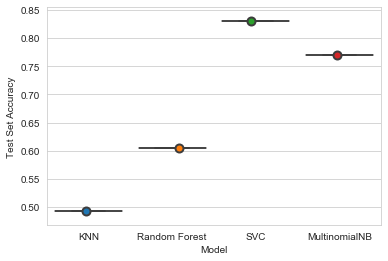

In [86]:
import seaborn as sns
sns.boxplot(x='Model', y='Test Set Accuracy', data=df)
sns.stripplot(x='Model', y='Test Set Accuracy', data=df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()